# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\kevin\Documents\pyma\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\kevin\Documents\pyma\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
drug_regimen_results=pd.merge(mouse_metadata, study_results, on="Mouse ID")
drr=drug_regimen_results

# Display the data table for preview
drr=drr.rename(columns={"Age_months":"Age in months"})
drr

,Mouse ID,Drug Regimen,Sex,Age in months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice.
mice=drr["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = drr.loc[drr.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = drr[drr['Mouse ID'].isin(duplicate_mice)==False]

In [16]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_stand = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    "Mean": regimen_mean,
    "Median": regimen_median,
    "Variance": regimen_variance,
    "Standard Deviation": regimen_stand,
    "SEM": regimen_sem
})

print(summary_df)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregation_functions = {
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
}
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby('Drug Regimen').agg(aggregation_functions)
summary_df.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
print(summary_df)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

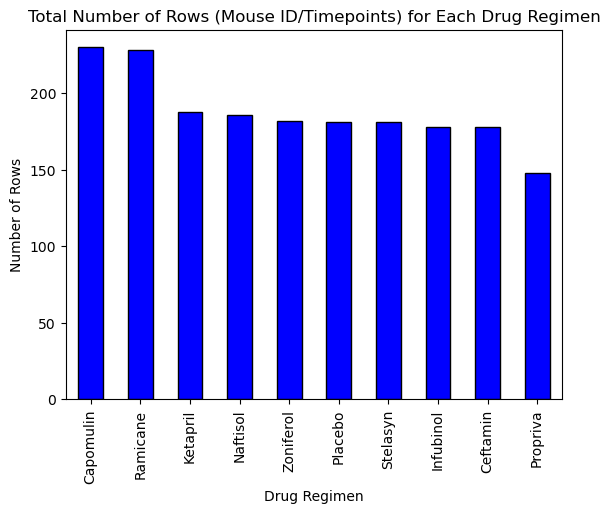

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.show()

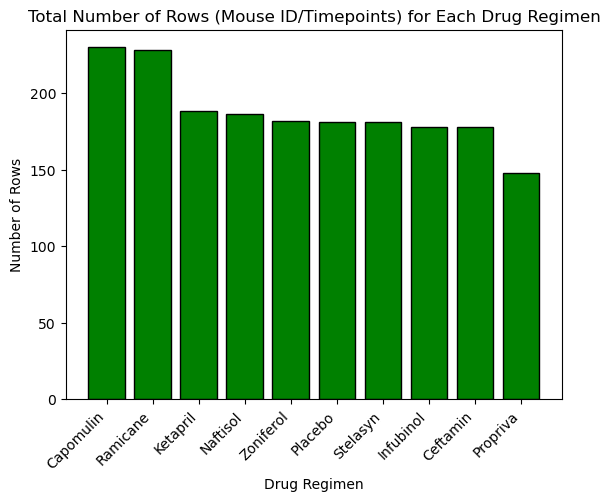

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='green', edgecolor='black')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xticks(rotation=45, ha='right')
plt.show()

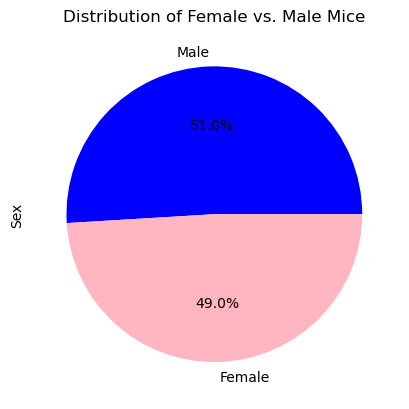

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'lightpink'])
plt.title('Distribution of Female vs. Male Mice')
plt.title('Distribution of Female vs. Male Mice')
plt.show()

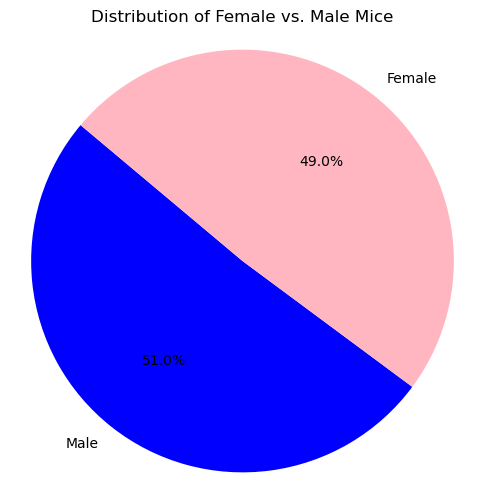

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_df['Sex'].value_counts()
plt.figure(figsize=(6, 6)) 
plt.pie(gender_counts, labels=gender_counts.index, colors=['blue', 'lightpink'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tr = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volume_df = pd.merge(clean_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'])
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(treatment_regimens)]
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       k403     Ramicane         45           22.050126
1       s185    Capomulin         45           23.343598
2       x401    Capomulin         45           28.484033
3       m601    Capomulin         45           28.430964
4       g791     Ramicane         45           29.128472
..       ...          ...        ...                 ...
234     x822     Ceftamin         45           61.386660
236     y163    Infubinol         45           67.685569
240     y769     Ceftamin         45           68.594745
241     y865     Ceftamin         45           64.729837
245     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset 
    # Determine outliers using upper and lower bounds
tr
tumor_volume_data = {}
for treatment in tr:
    tumor_volumes = clean_df.loc[clean_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data[treatment] = tumor_volumes
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    print(f"-------------------------------------------")
    print(f"Regimen: {treatment}")
    print(f"Lower Quartile: {lower_quartile:.2f}")
    print(f"Upper Quartile: {upper_quartile:.2f}")
    print(f"IQR: {iqr:.2f}")
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    if not outliers.empty:
        print(f"Potential Outliers:")
        print(outliers)
    else:
        print("No potential outliers.")

-------------------------------------------
Regimen: Capomulin
Lower Quartile: 37.69
Upper Quartile: 45.00
IQR: 7.31
Potential Outliers:
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
-------------------------------------------
Regimen: Ramicane
Lower Quartile: 36.67
Upper Quartile: 45.00
IQR: 8.33
Potential Outliers:
9    22.050126
Name: Tumor Volume (mm3), dtype: float64
-------------------------------------------
Regimen: Infubinol
Lower Quartile: 47.31
Upper Quartile: 57.31
IQR: 10.00
No potential outliers.
-------------------------------------------
Regimen: Ceftamin
Lower Quartile: 47.21
Upper Quartile: 56.80
IQR: 9.59
No potential outliers.


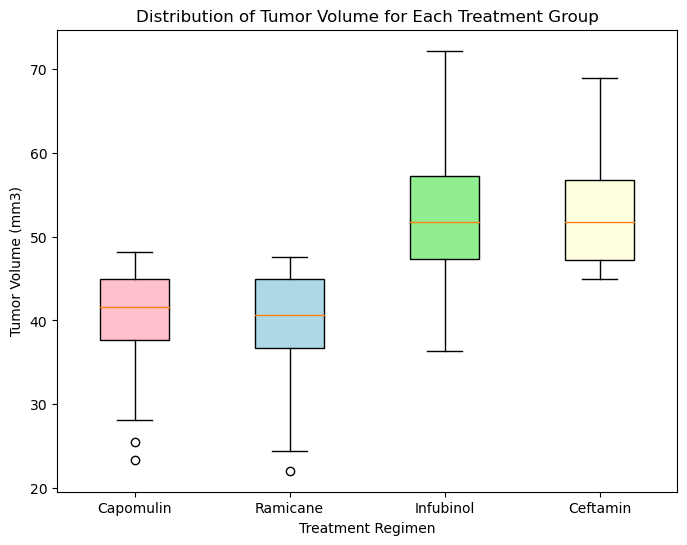

In [53]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tr
tumor_volume_data = []
for treatment in tr:
    tumor_volumes = clean_df.loc[clean_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)

plt.figure(figsize=(8, 6))
box_plot = plt.boxplot(tumor_volume_data, labels=tr, patch_artist=True)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
box_colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(box_plot['boxes'], box_colors):
    patch.set_facecolor(color)
plt.show()

## Line and Scatter Plots

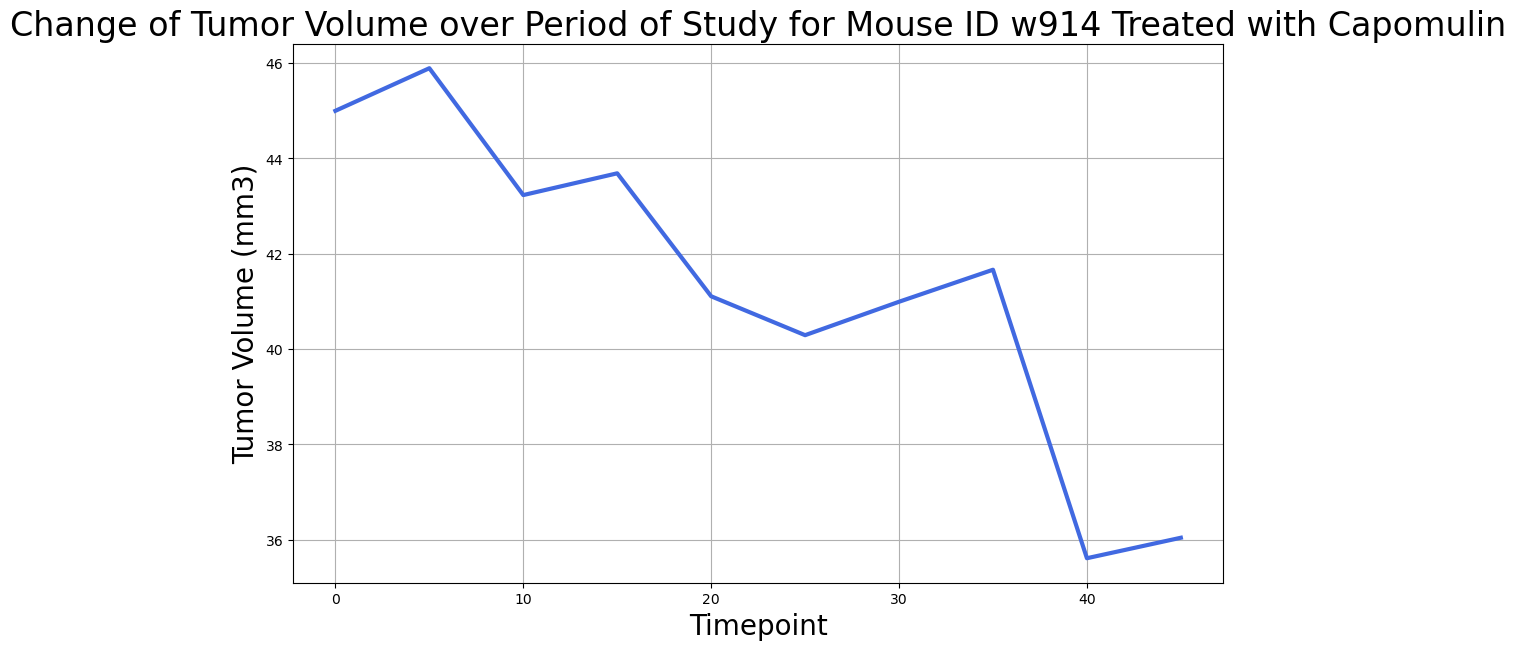

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
sorted_mouseid_timepoint_df = clean_df.sort_values(['Mouse ID', 'Timepoint'])
target_mouse_id = 'w914' 
target_mouse_sorted = sorted_mouseid_timepoint_df.loc[sorted_mouseid_timepoint_df['Mouse ID'] == target_mouse_id, :]
target_mouse = target_mouse_sorted.sort_values('Timepoint')
target_mouse_plot = target_mouse[['Timepoint', 'Tumor Volume (mm3)']]
target_mouse_plot = target_mouse_plot.set_index('Timepoint')
plt.figure(figsize=(12, 7))
plt.plot(target_mouse_plot.index, target_mouse_plot['Tumor Volume (mm3)'], linewidth=3, color='royalblue')
plt.title(f'Change of Tumor Volume over Period of Study for Mouse ID {target_mouse_id} Treated with Capomulin', fontsize=24)
plt.xlabel('Timepoint', fontsize=20, color='black')
plt.ylabel('Tumor Volume (mm3)', fontsize=20, color='black')
plt.legend('', frameon=False)
plt.grid(True)
plt.show()

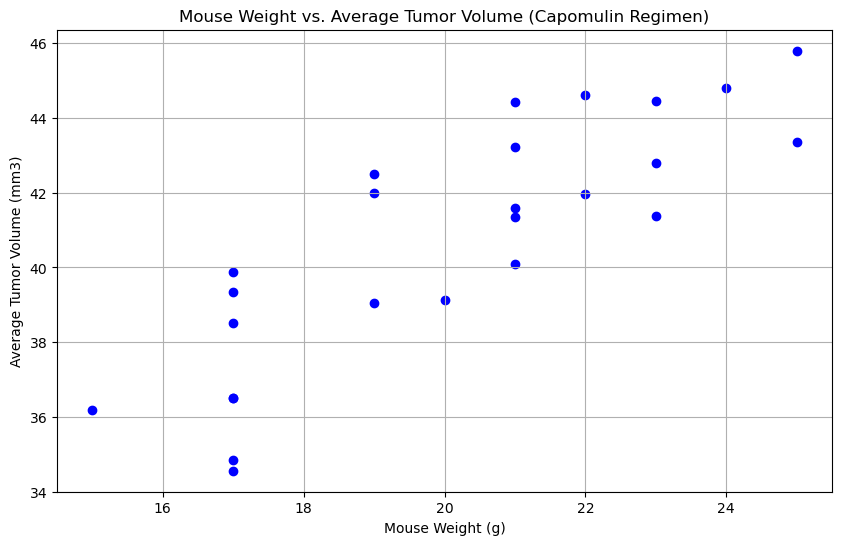

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_tumor_volume_df = pd.DataFrame({
    'Mouse ID': average_tumor_volume.index,
    'Average Tumor Volume (mm3)': average_tumor_volume.values
})
scatter_df = pd.merge(avg_tumor_volume_df, mouse_metadata, on='Mouse ID')
plt.figure(figsize=(10, 6))  
plt.scatter(scatter_df['Weight (g)'], scatter_df['Average Tumor Volume (mm3)'], color='b', marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694719


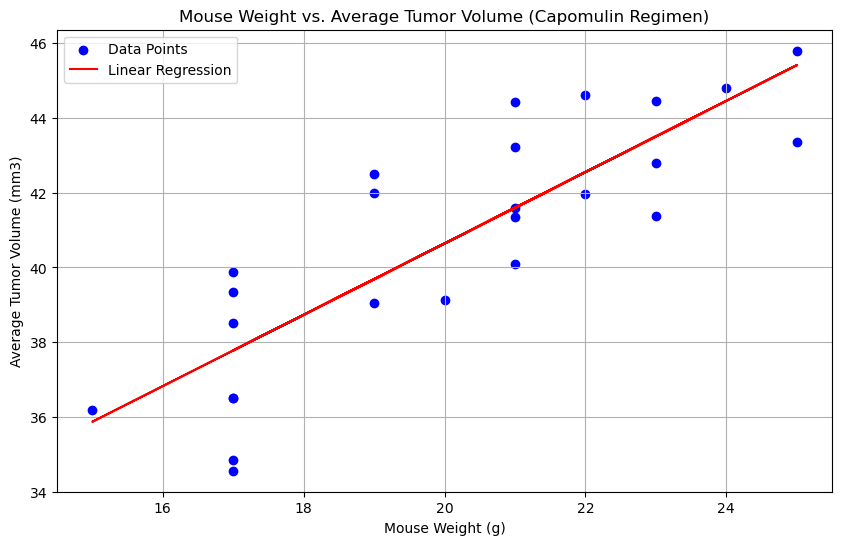

In [73]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_tumor_volume_df = pd.DataFrame({
    'Mouse ID': average_tumor_volume.index,
    'Average Tumor Volume (mm3)': average_tumor_volume.values
})
scatter_df = pd.merge(avg_tumor_volume_df, mouse_metadata, on='Mouse ID')
correlation_coefficient, p_value = st.pearsonr(scatter_df['Weight (g)'], scatter_df['Average Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")
slope, intercept, r_value, p_value, std_err = st.linregress(scatter_df['Weight (g)'], scatter_df['Average Tumor Volume (mm3)'])
def predict_tumor_volume(weight):
    return slope * weight + intercept
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['Weight (g)'], scatter_df['Average Tumor Volume (mm3)'], color='b', marker='o', label='Data Points')
plt.plot(scatter_df['Weight (g)'], predict_tumor_volume(scatter_df['Weight (g)']), color='r', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()